In [18]:
# importing all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
df = pd.DataFrame({'Value':['100','78','129'] , 'Date':['02/20/2015','01/15/2016','08/21/2015']})

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

print(df)

print(df.sort_values(by='Date'))

  Value       Date
0   100 2015-02-20
1    78 2016-01-15
2   129 2015-08-21
  Value       Date
0   100 2015-02-20
2   129 2015-08-21
1    78 2016-01-15


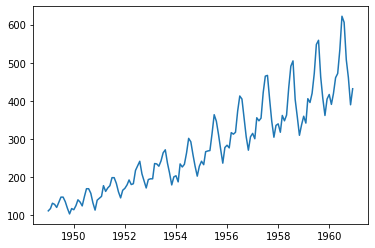

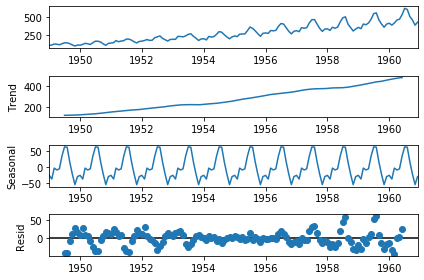

In [22]:
df = pd.read_csv('Datasets/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
plt.plot(df['Month'], df['#Passengers'])
plt.show()

df= df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

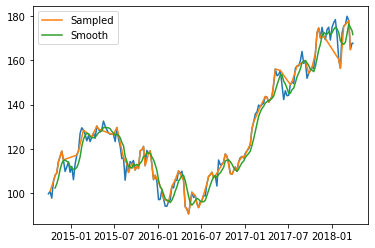

               Open   Close  log_price
Date                                  
2017-03-01  137.890  139.79   4.940141
2017-03-02  140.000  138.96   4.934186
2017-03-03  138.780  139.78   4.940070
2017-03-06  139.365  139.34   4.936917
2017-03-07  139.060  139.52   4.938208
2017-03-08  138.950  139.00   4.934474
2017-03-09  138.740  138.68   4.932169
2017-03-10  139.250  139.14   4.935481
2017-03-13  138.850  139.20   4.935912
2017-03-14  139.300  138.99   4.934402
2017-03-15  139.410  140.46   4.944923
2017-03-16  140.720  140.69   4.946559
2017-03-17  141.000  139.99   4.941571
2017-03-20  140.400  141.46   4.952017
2017-03-21  142.110  139.84   4.940499
2017-03-22  139.845  141.42   4.951734
2017-03-23  141.260  140.92   4.948192
2017-03-24  141.500  140.64   4.946203
2017-03-27  139.390  140.88   4.947908
2017-03-28  140.910  143.80   4.968423
2017-03-29  143.680  144.12   4.970646
2017-03-30  144.190  143.93   4.969327
2017-03-31  143.720  143.66   4.967449
2.73081001636184
2.784543

In [31]:
data = pd.read_csv('Datasets/AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'])
# plt.show()

# Sample time series
data_one_tenth = data.sample(frac=0.5)
data_one_tenth = data_one_tenth.sort_values(by=['Tick'])
plt.plot(data_one_tenth['Date'], data_one_tenth['Close'], label='Sampled')

# Smooth the dataset

data['Rolling_Mean']  = data['Close'].rolling(window=5).mean()
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth')

# plot them all
plt.legend()
plt.show()

import quandl

quandl.ApiConfig.api_key = 'HYu8pcAb1BtHJ5r_PcDq'
#get quandl data
aapl_table = quandl.get('WIKI/AAPL')
aapl_table.to_pickle('apple_quandl.pkl')
# aapl_table.head()
aapl = aapl_table.loc['2017-3',['Open','Close']]

# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
print(aapl)
print(x.sum()*100)

# Another way to compute the montly return
returns = aapl['Close'].pct_change()
print(returns.sum()*100)
print(np.log(143.66/139.79)*100)